# EPL Soccer Match Predictions

There are many factors that play a part in which soccer team wins a match. The dataset we will use to predict a result label, home win, away win, or draw, contains a variety of statistics that will contribute to the final results a game will have. Like any sport, soccer has exceptions to the final result and some statistics will not be able to tell the full story. 

The dataset consists of statistics scraped from the EPL website using each match ID. This webscraper uses selenium and each element's xpath to acquire the particular statistic for each game.

This master's project consists of taking each game from the 19/20 and 20/21 seasons to predict each upcoming game in the current season of 21/22. 

ADD HTR 


-Daniel Avila

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [317]:
df = pd.read_csv('./Premier_league_dataset.csv')
df

,date,home_team,away_team,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,...,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls_conceded,away_fouls_conceded
0,8/9/19,Liverpool,Norwich City,4,1,57.9,42.1,7,5,15,...,11,2,0,5,0,2,0,0,9,9
1,8/10/19,AFC Bournemouth,Sheffield United,1,1,52.9,47.1,3,3,13,...,3,4,1,1,2,1,0,0,10,19
2,8/10/19,Burnley,Southampton,3,0,46.5,53.5,4,3,10,...,2,7,5,1,0,0,0,0,6,12
3,8/10/19,Crystal Palace,Everton,0,0,35.4,64.6,2,3,6,...,6,2,4,0,2,1,0,1,16,14
4,8/11/19,Leicester City,Wolverhampton Wanderers,0,0,70.0,30.0,1,2,16,...,12,3,0,1,0,2,0,0,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,5/23/21,Liverpool,Crystal Palace,2,0,69.6,30.4,5,4,19,...,14,1,2,1,2,2,0,0,10,8
375,5/23/21,Manchester City,Everton,5,0,67.7,32.3,11,3,21,...,7,5,1,1,2,2,0,0,8,10
376,5/23/21,Sheffield United,Burnley,1,0,43.0,57.0,3,3,12,...,8,9,2,1,3,1,0,0,11,1
377,5/23/21,West Ham United,Southampton,3,0,36.9,63.1,7,5,14,...,2,3,5,2,0,3,0,0,5,9


In [318]:
df.head(5)

,date,home_team,away_team,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,...,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls_conceded,away_fouls_conceded
0,8/9/19,Liverpool,Norwich City,4,1,57.9,42.1,7,5,15,...,11,2,0,5,0,2,0,0,9,9
1,8/10/19,AFC Bournemouth,Sheffield United,1,1,52.9,47.1,3,3,13,...,3,4,1,1,2,1,0,0,10,19
2,8/10/19,Burnley,Southampton,3,0,46.5,53.5,4,3,10,...,2,7,5,1,0,0,0,0,6,12
3,8/10/19,Crystal Palace,Everton,0,0,35.4,64.6,2,3,6,...,6,2,4,0,2,1,0,1,16,14
4,8/11/19,Leicester City,Wolverhampton Wanderers,0,0,70.0,30.0,1,2,16,...,12,3,0,1,0,2,0,0,3,13


In [319]:
df.tail(5)

,date,home_team,away_team,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,...,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls_conceded,away_fouls_conceded
374,5/23/21,Liverpool,Crystal Palace,2,0,69.6,30.4,5,4,19,...,14,1,2,1,2,2,0,0,10,8
375,5/23/21,Manchester City,Everton,5,0,67.7,32.3,11,3,21,...,7,5,1,1,2,2,0,0,8,10
376,5/23/21,Sheffield United,Burnley,1,0,43.0,57.0,3,3,12,...,8,9,2,1,3,1,0,0,11,1
377,5/23/21,West Ham United,Southampton,3,0,36.9,63.1,7,5,14,...,2,3,5,2,0,3,0,0,5,9
378,5/23/21,Wolverhampton Wanderers,Manchester United,1,2,57.2,42.8,4,4,14,...,6,2,1,1,4,1,0,0,14,3


In [320]:
def final_result(game):
    '''Add a result label to make it easier to predict the final result of each game'''
    if game['home_score'] == game['away_score']:
        result = 'D'
    elif game['home_score'] > game['away_score']:
        result = 'H'
    else:
        result = 'A'
    return result

In [321]:
df['final_result'] = df.apply(final_result, axis=1)
df

,date,home_team,away_team,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,...,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls_conceded,away_fouls_conceded,final_result
0,8/9/19,Liverpool,Norwich City,4,1,57.9,42.1,7,5,15,...,2,0,5,0,2,0,0,9,9,H
1,8/10/19,AFC Bournemouth,Sheffield United,1,1,52.9,47.1,3,3,13,...,4,1,1,2,1,0,0,10,19,D
2,8/10/19,Burnley,Southampton,3,0,46.5,53.5,4,3,10,...,7,5,1,0,0,0,0,6,12,H
3,8/10/19,Crystal Palace,Everton,0,0,35.4,64.6,2,3,6,...,2,4,0,2,1,0,1,16,14,D
4,8/11/19,Leicester City,Wolverhampton Wanderers,0,0,70.0,30.0,1,2,16,...,3,0,1,0,2,0,0,3,13,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,5/23/21,Liverpool,Crystal Palace,2,0,69.6,30.4,5,4,19,...,1,2,1,2,2,0,0,10,8,H
375,5/23/21,Manchester City,Everton,5,0,67.7,32.3,11,3,21,...,5,1,1,2,2,0,0,8,10,H
376,5/23/21,Sheffield United,Burnley,1,0,43.0,57.0,3,3,12,...,9,2,1,3,1,0,0,11,1,H
377,5/23/21,West Ham United,Southampton,3,0,36.9,63.1,7,5,14,...,3,5,2,0,3,0,0,5,9,H


## Data Quality Assessment

In [322]:
# Looking through each value to detect NaN values would take too much time 
df.isnull().sum()

date                    0
home_team               0
away_team               0
home_score              0
away_score              0
home_possession_%       0
away_possession_%       0
home_shots_on_target    0
away_shots_on_target    0
home_shots              0
away_shots              0
home_touches            0
away_touches            0
home_passes             0
away_passes             0
home_tackles            0
away_tackles            0
home_clearances         0
away_clearances         0
home_corners            0
away_corners            0
home_offsides           0
away_offsides           0
home_yellow_cards       0
away_yellow_cards       0
home_red_cards          0
away_red_cards          0
home_fouls_conceded     0
away_fouls_conceded     0
final_result            0
dtype: int64

In [323]:
# Check for types of each column. Object type is a string in this case
df.dtypes

date                     object
home_team                object
away_team                object
home_score                int64
away_score                int64
home_possession_%       float64
away_possession_%       float64
home_shots_on_target      int64
away_shots_on_target      int64
home_shots                int64
away_shots                int64
home_touches              int64
away_touches              int64
home_passes               int64
away_passes               int64
home_tackles              int64
away_tackles              int64
home_clearances           int64
away_clearances           int64
home_corners              int64
away_corners              int64
home_offsides             int64
away_offsides             int64
home_yellow_cards         int64
away_yellow_cards         int64
home_red_cards            int64
away_red_cards            int64
home_fouls_conceded       int64
away_fouls_conceded       int64
final_result             object
dtype: object

## Feature Aggregation

In [324]:
# Amount of goals scored, conceded, yellow/red cards, etc. per team
teams = df['home_team'].unique()
teams

array(['Liverpool', 'AFC Bournemouth', 'Burnley', 'Crystal Palace',
       'Leicester City', 'Tottenham Hotspur', 'Watford',
       'West Ham United', 'Manchester United', 'Newcastle United',
       'Arsenal', 'Aston Villa', 'Brighton and Hove Albion', 'Chelsea',
       'Everton', 'Manchester City', 'Norwich City', 'Sheffield United',
       'Southampton', 'Wolverhampton Wanderers', 'Fulham', 'Leeds United'],
      dtype=object)

In [325]:
df.groupby('home_team')[['home_score', 'away_score', 'home_shots_on_target', 'away_shots_on_target']].sum()

,home_score,away_score,home_shots_on_target,away_shots_on_target
home_team,,,,
AFC Bournemouth,22,30,61,91
Arsenal,35,22,91,100
Aston Villa,24,31,83,97
Brighton and Hove Albion,20,27,69,78
Burnley,23,21,79,74
Chelsea,28,16,118,39
Crystal Palace,14,19,66,79
Everton,23,18,88,56
Fulham,0,2,0,4


## Data Visualization

In [326]:
df['final_result'].value_counts()

H    175
A    115
D     89
Name: final_result, dtype: int64

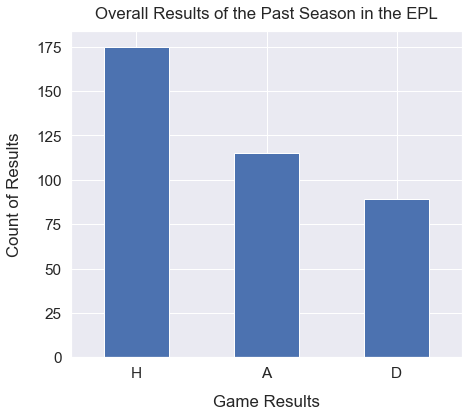

In [327]:
sns.set(font_scale=1.4)
df['final_result'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Game Results", labelpad=14)
plt.ylabel("Count of Results", labelpad=14)
plt.title("Overall Results of the Past Season in the EPL", y=1.02);

<AxesSubplot:ylabel='final_result'>

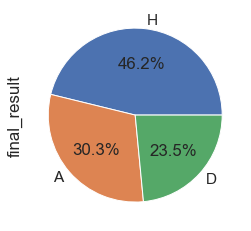

In [328]:
df['final_result'].value_counts().plot(kind='pie', autopct='%1.1f%%')

array([[<AxesSubplot:xlabel='home_score', ylabel='home_score'>,
        <AxesSubplot:xlabel='away_score', ylabel='home_score'>,
        <AxesSubplot:xlabel='home_touches', ylabel='home_score'>,
        <AxesSubplot:xlabel='away_touches', ylabel='home_score'>],
       [<AxesSubplot:xlabel='home_score', ylabel='away_score'>,
        <AxesSubplot:xlabel='away_score', ylabel='away_score'>,
        <AxesSubplot:xlabel='home_touches', ylabel='away_score'>,
        <AxesSubplot:xlabel='away_touches', ylabel='away_score'>],
       [<AxesSubplot:xlabel='home_score', ylabel='home_touches'>,
        <AxesSubplot:xlabel='away_score', ylabel='home_touches'>,
        <AxesSubplot:xlabel='home_touches', ylabel='home_touches'>,
        <AxesSubplot:xlabel='away_touches', ylabel='home_touches'>],
       [<AxesSubplot:xlabel='home_score', ylabel='away_touches'>,
        <AxesSubplot:xlabel='away_score', ylabel='away_touches'>,
        <AxesSubplot:xlabel='home_touches', ylabel='away_touches'>,
        <

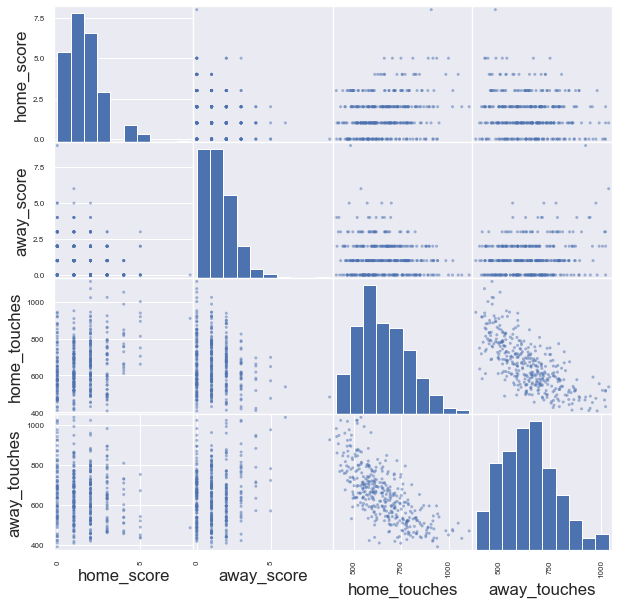

In [329]:
scatter_matrix(df[['home_score','away_score','home_touches','away_touches']], figsize=(10,10))

## Data Prep

In [330]:
# Get rid of feature column name for X and have target labels in Y
X = df.drop(['date', 'home_team', 'away_team', 'final_result'], 1)
y = df['final_result']

In [348]:
# Normalize data 
from sklearn.preprocessing import scale

columns = [['home_score', 'away_score', 'home_possession_%', 'away_possession_%']]
for i in columns:
    X[i] = scale(X[i])
    
# Helper functions
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    clf.fit(X_train, y_train)
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    y_pred = clf.predict(features)
    
    # Print and return results
    return f1_score(target, y_pred, pos_label='H', average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    # Indicate the classifier and the training set size
    print("Training {} ".format(clf.__class__.__name__))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("Training accuracy score and F1: {:.4f} , {:.4f}.".format(acc , f1))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("Testing accuracy score and F1: {:.4f} , {:.4f}.".format(acc , f1))

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=2, stratify=y)

In [350]:

clf_A = LogisticRegression()
clf_B = SVC(random_state = 912, kernel='rbf')
clf_C = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf_D = RandomForestClassifier(max_depth=2, random_state=0)
train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)
train_predict(clf_D, X_train, y_train, X_test, y_test)
print()

Training LogisticRegression 
0.6656534954407295 0.6656534954407295
Training accuracy score and F1: 0.6657 , 0.6657.
Testing accuracy score and F1: 0.6400 , 0.6400.
Training SVC 
0.46200607902735563 0.46200607902735563
Training accuracy score and F1: 0.4620 , 0.4620.
Testing accuracy score and F1: 0.4600 , 0.4600.
Training DecisionTreeClassifier 
0.7781155015197568 0.7781155015197568
Training accuracy score and F1: 0.7781 , 0.7781.
Testing accuracy score and F1: 0.8800 , 0.8800.
Training RandomForestClassifier 
0.7082066869300911 0.7082066869300911
Training accuracy score and F1: 0.7082 , 0.7082.
Testing accuracy score and F1: 0.7000 , 0.7000.



## Grid Search

In [343]:
# Hyperparameter list for tuning
parameters = { 'tol' : [1e-4],
               'C' : [1.0],
               'random_state' : [1],
               'max_iter' : [100],
             }

clf = LogisticRegression(random_state=42, max_iter=1000)
f1_scorer = make_scorer(f1_score, pos_label='H')
grid_obj = GridSearchCV(clf, scoring=f1_scorer, param_grid=parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(clf)

f1, acc = predict_labels(clf, X_train, y_train)
print('Training f1 and accuracy scores {}, {}'.format(f1, acc))

f1, acc = predict_labels(clf, X_test, y_test)
print('Testing f1 and accuracy scores {}, {}'.format(f1, acc))

LogisticRegression(random_state=1)
Training f1 and accuracy scores 0.6656534954407295, 0.6656534954407295
Testing f1 and accuracy scores 0.64, 0.64


In [335]:
# Hyperparameter list for tuning
parameters = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : range(1, 10),
               'min_samples_split' : range(1, 10),
               'min_samples_leaf' : range(1,5)
             }

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
f1_scorer = make_scorer(f1_score, pos_label='H')
grid_obj = GridSearchCV(clf, param_grid=parameters, cv=10, verbose=1, n_jobs=-1)
grid_obj.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [336]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [337]:
grid_obj.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=0)

In [338]:
grid_obj.best_score_

0.9939393939393939

In [339]:
t = SVC()
t.fit(X_train, y_train)
y_pred = t.predict(X_test)
df_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

compare = np.where(df_actual_predicted['Actual'] == df_actual_predicted['Predicted'], True, False)
df_actual_predicted['Comparison'] = compare
df_actual_predicted

,Actual,Predicted,Comparison
231,A,H,False
125,A,H,False
39,H,H,True
334,H,H,True
138,A,H,False
55,H,H,True
290,D,H,False
29,D,H,False
172,H,H,True
133,D,H,False


In [344]:
t = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
t.fit(X_train, y_train)
y_pred = t.predict(X_test)
df_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


compare = np.where(df_actual_predicted['Actual'] == df_actual_predicted['Predicted'], True, False)
df_actual_predicted['Comparison'] = compare
